<a href='https://www.darshan.ac.in/'> <img src='https://www.darshan.ac.in/Content/media/DU_Logo.svg' width="250" height="300"/></a>
<pre>
<center><b><h1>Machine Learning - 2301CS621</b></center>

<center><b><h1>Lab - 11 </b></center>
<pre>    

### Name: Vakta Ladani
### Enrollment No: 22010101098
### Date:04/03/25

## Step 1: Import Necessary Libraries
complete the import statements below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

## Step 2: Load the Dataset
Load the dataset (e.g., Iris dataset) or use your own.

In [2]:
data = load_iris()
X = data.data
y = data.target

## Step 3: Preprocess the Data (Standardization)
Standardize the dataset before applying PCA or LDA.

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Step 4: Apply PCA
Perform PCA and extract the principal components.

In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [5]:
X_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

## Step 5: Apply LDA
Perform LDA and extract the discriminant components.

In [6]:
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)
X_lda

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

## Step 6: Visualization
Visualize PCA and LDA results using scatter plots.

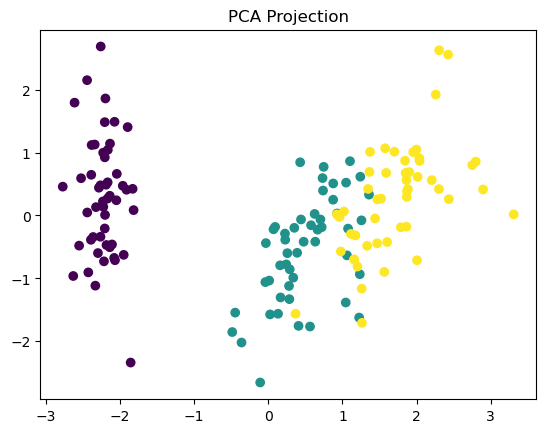

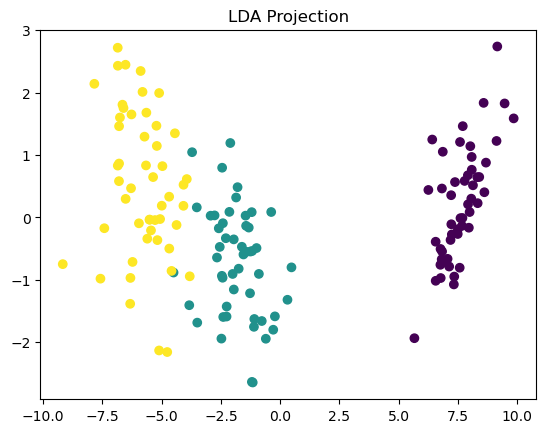

In [7]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='viridis')
plt.title('PCA Projection')
plt.show()

plt.scatter(X_lda[:,0], X_lda[:,1], c=y, cmap='viridis')
plt.title('LDA Projection')
plt.show()

## Train the model using above data 

## Step 7: Feature Selection using Filter Methods
In this section, you will apply different filter methods such as:
- **Pearson Correlation Coefficient**
- **Chi-Square Test**
- **Variance Thresholding**

### 8.1 Pearson Correlation Coefficient
Calculate the correlation between features and the target variable.

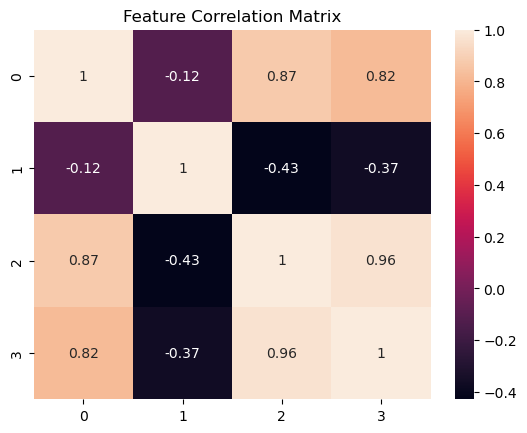

In [8]:
import seaborn as sns
import numpy as np
correlation_matrix = np.corrcoef(X_scaled.T)
sns.heatmap(correlation_matrix, annot=True)
plt.title('Feature Correlation Matrix')
plt.show()

### 8.2 Chi-Square Test
Use the Chi-Square test to determine the relationship between features and the target variable.

### 8.3 Variance Thresholding
Remove features with low variance as they may not be useful for predictions.

In [9]:

from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=1.0)
X_selected = selector.fit_transform(X_scaled)
print('Selected Features Shape:', X_selected.shape)

Selected Features Shape: (150, 1)


## Step 9: Feature Selection using Wrapper Methods
Wrapper methods evaluate feature subsets based on model performance.
In this section, we will use:
- **Recursive Feature Elimination (RFE)**
- **Sequential Feature Selection (SFS)**

### 9.1 Recursive Feature Elimination (RFE)
RFE removes the least important features iteratively until the optimal subset is reached.

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
rfe = RFE(model, n_features_to_select=2)
X_rfe = rfe.fit_transform(X_scaled, y)
print('Selected Features Shape:', X_rfe.shape)

Selected Features Shape: (150, 2)


### 9.2 Sequential Feature Selection (SFS)
SFS iteratively selects the best-performing features by adding or removing them.

In [11]:
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=2, direction='forward')
X_sfs = sfs.fit_transform(X_scaled, y)
print('Selected Features Shape:', X_sfs.shape)

Selected Features Shape: (150, 2)


## Step 10: Applying PCA on Digits Dataset
In this section, we will apply PCA on the `load_digits` dataset, which consists of handwritten digit images, and visualize its effect.

### 10.1 Load and Visualize the Digits Dataset
We will load the dataset and visualize some sample images.

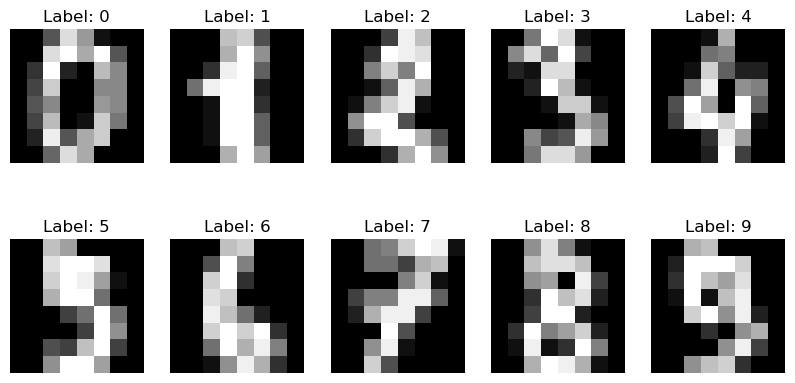

In [12]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()
X_digits = digits.data
y_digits = digits.target

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Label: {digits.target[i]}')
    ax.axis('off')
plt.show()

### 10.2 Apply PCA and Reduce Dimensions
We will reduce the dataset to 2 principal components and visualize the transformed data.

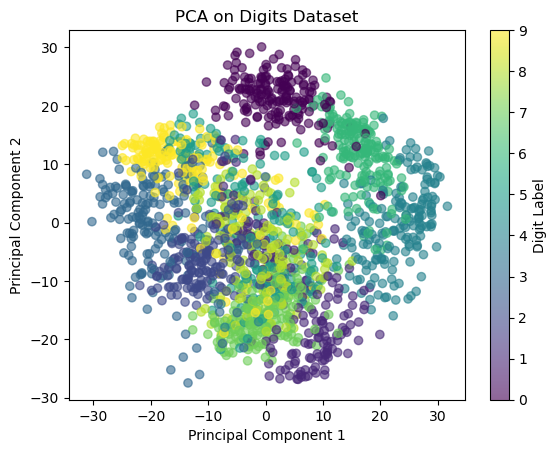

In [13]:

from sklearn.decomposition import PCA
import numpy as np

pca_digits = PCA(n_components=2)
X_pca_digits = pca_digits.fit_transform(X_digits)


plt.scatter(X_pca_digits[:, 0], X_pca_digits[:, 1], c=y_digits, cmap='viridis', alpha=0.6)
plt.colorbar(label='Digit Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA on Digits Dataset')
plt.show()

In [14]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import chi2
import pandas as pd

data = load_iris()
x, y = data.data, data.target
feature_names = data.feature_names

selector = SelectKBest(score_func=chi2,)  
X_new = selector.fit_transform(x, y)

chi_scores_df = pd.DataFrame({'Feature': feature_names, 'Chi2 Score': selector.scores_})
print(chi_scores_df.sort_values(by="Chi2 Score", ascending=False))

NameError: name 'SelectKBest' is not defined